# Poisson regression

We now want to fit data that in which the elements of the dependent variable Y follow a Poisson distribution. 
The most common application is a histogram. In this case, the X variable represents the bin centers, and Y the bin counts.

Let us start with the data to fit:

In [1]:
import numpy as np
xdata = np.linspace(start=-2.9, stop=2.9, num=30)
nevents = np.array([0, 2, 5, 8, 7, 18, 15, 27, 34, 51, 55, 63, 67, 75, 90, 78, 73, 70, 62, 51, 33, 26, 30, 17, 15, 14,
                    5, 4, 1, 0])

We will fit the data with a normal distribution:

In [2]:
from scipy.stats import norm
def fit_model(x, par):
    return par[0] * norm.pdf(x, loc=par[1], scale=par[2])

The model has three free paramaters: 
1. Normalization
2. Mean
3. Standard deviation

We create a fitter for our data with the `Poisson` class:

In [3]:
import likefit
fitter = likefit.Poisson(xdata, nevents, fit_model)

We then fit the data:

In [4]:
initial_parameters = np.array([1, 0, 1])
fit_status = fitter.fit(initial_parameters)
print(fit_status)

0


and print the results,

In [5]:
fitter.print_results()

Fit summary
Estimators: [ 1.99758584e+02 -3.09705947e-02  1.00476238e+00]
Errors: [3.76518451 0.03182708 0.02272416]
Covariance matrix: [[1.41766144e+01 1.02991753e-03 2.33770158e-03]
 [1.02991753e-03 1.01296274e-03 1.10350522e-05]
 [2.33770158e-03 1.10350522e-05 5.16387604e-04]]
Correlation matrix: [[1.         0.00859448 0.02732215]
 [0.00859448 1.         0.01525772]
 [0.02732215 0.01525772 1.        ]]
Chi square: 20.671180840213967
Degrees of freedom: 27
Pvalue: 0.8014435281139468


We finish by plotting the fit

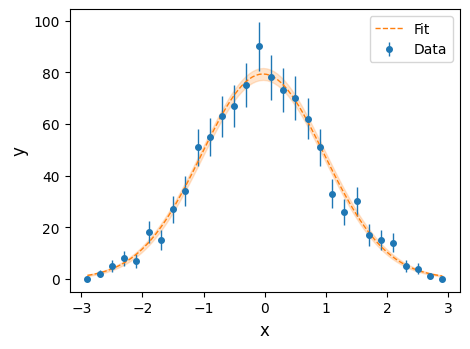

In [6]:
fitter.plot_fit()